<a href="https://colab.research.google.com/github/FavyGirlie/FavyGirlie/blob/main/Flight_Fare_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FLIGHT FARE PREDICTION MODEL

This model uses machine learning and data analysis to forcast future flight prices, thereby helping travellers make informed decisions on when to book flights.

In [36]:
# Import Important Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import statsmodels.api as sm
import numpy as np
from sklearn.impute import SimpleImputer
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [37]:
#Load the Train data
df = pd.read_excel('/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [38]:
# Load the Test dataset
df2 = pd.read_excel('/Test_set.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#Exploratory Data Analysis

In [39]:
# Displaying dataframe shape and checking for duplicates
print(df.dtypes)
print(df.shape)
df1 = df.duplicated()
df2 = df2.duplicated()

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object
(10683, 11)


In [40]:
# Check for missing values and take care of them
print(df.isnull().sum())
print(df2.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
0


In [41]:
# Encoding categorical variables that will be used for regression
le = LabelEncoder()
df['Dep_Time'] = le.fit_transform(df['Dep_Time'])
df['Arrival_Time'] = le.fit_transform(df['Arrival_Time'])
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])
df['Airline'] = le.fit_transform(df['Airline'])


In [42]:
#Selecting specific columns as features from the dataframe while adding a constant term
x = sm.add_constant(df[['Dep_Time','Arrival_Time','Source','Destination','Airline']])

#Selecting the price column as the target variable
y = df['Price']

#Creating and fitting an Ordinary Least Squares Regression Model to the data
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     17.58
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           2.20e-17
Time:                        09:29:45   Log-Likelihood:            -1.0524e+05
No. Observations:               10683   AIC:                         2.105e+05
Df Residuals:                   10677   BIC:                         2.105e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9833.2091    214.762     45.786   

In [43]:
#Creating the predicted price column
df["Predicted_Price"] = model.predict(x)
print(df[['Dep_Time','Arrival_Time','Source','Destination','Airline','Predicted_Price']])

       Dep_Time  Arrival_Time  Source  Destination  Airline  Predicted_Price
0           211           233       0            5        3      8198.162309
1            31           906       3            0        1      9584.659970
2            70           413       2            1        4      9056.074879
3           164          1324       3            0        3      9558.733715
4           149          1237       0            5        3      8543.228235
...         ...           ...     ...          ...      ...              ...
10678       183          1259       3            0        0      9758.073265
10679       193          1305       3            0        1      9697.686184
10680        58           824       0            2        4      9219.233410
10681        92           938       0            5       10      7928.443064
10682        85          1124       2            1        1      9516.445973

[10683 rows x 6 columns]


In [44]:
# Selecting specific columns as features from the dataframe
x = df[['Dep_Time','Arrival_Time','Source','Destination','Airline']]
y = df['Price']

#Importing Linear Regression Model
from sklearn.linear_model import LinearRegression
x = x
y = y

#Creating and fitting the model to the data
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
print(y_pred)

[8198.16230944 9584.65996976 9056.07487893 ... 9219.23340996 7928.44306433
 9516.44597271]


#SCALING THE RESULT

In [45]:
# Importing the model
from sklearn.linear_model import LinearRegression

#Creating a StandardScaler Object
scaler = StandardScaler()
df['scaled_Dep_Time'] = scaler.fit_transform(df[['Dep_Time']])
df['scaled_Arrival_Time'] = scaler.fit_transform(df[['Arrival_Time']])
df['scaled_Source'] = scaler.fit_transform(df[['Source']])
df['scaled_Destination'] = scaler.fit_transform(df[['Destination']])
df['scaled_Airline'] = scaler.fit_transform(df[['Airline']])
df['scaled_Price'] = scaler.fit_transform(df[['Price']])



scaled_x = df[['scaled_Dep_Time','scaled_Arrival_Time','scaled_Source','scaled_Destination','scaled_Airline']]
scaled_y = df['scaled_Price']

x = scaled_x
y = scaled_y
model = LinearRegression()
model.fit(x, y)
y_scale_pred = model.predict(x)
print(y_scale_pred)

[-0.19277254  0.1079116  -0.00672051 ...  0.02866302 -0.25126546
  0.09311831]


This indicates that the prices are normalized or standardized to a specific minimum range of -0.0067 and a maximum range of 0.1928

#DISTRIBUTION ANALYSIS

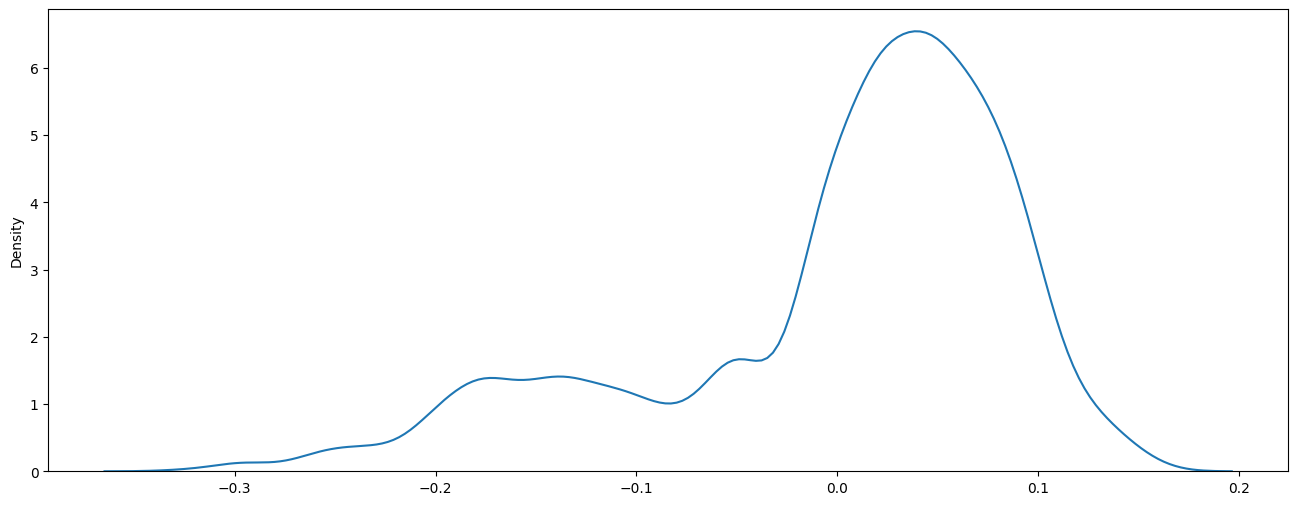

In [46]:
plt.figure(figsize=(16,6))
sns.kdeplot(y_scale_pred)
plt.show()
